In [1]:
import math
import numpy as np


#Array creation
N = 10
A = np.arange(N)
print(A)

[0 1 2 3 4 5 6 7 8 9]


In [2]:
A = A.reshape(5,2)
print(A)
print(f"A shape: {A.shape}")

[[0 1]
 [2 3]
 [4 5]
 [6 7]
 [8 9]]
A shape: (5, 2)


In [3]:
B = np.arange(2*N)
print(B)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [4]:
B = B.reshape(2,10)
print(B)
print(f"B shape: {B.shape}")

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]]
B shape: (2, 10)


In [6]:
#Array operations
# Element-wise operations - these can only be applied to arrays that have the same shape 
# (or if their shapes can be "broadcast" together - more on this later)
A1 = np.arange(N).reshape(A.shape)
C = A + A1
print(C)

[[ 0  2]
 [ 4  6]
 [ 8 10]
 [12 14]
 [16 18]]


In [7]:
# Broadcasting - as long as an array's dimensions are compatible with their 
# counterparts in the other array, they can be "broadcasted" together. This means that numpy will 'strectch'
# the smaller dimension along its axis so that element-wise operations can be applied between them
A2 = np.arange(5).reshape(5,1)
print(A2, A2.shape)  

# A2 has shape (5, 1) so it can be broadcast to shape (5, 2) along A's horizontal axis
# it's as if A2 has been copied along the horizontal axis so that it can be added to A
D = A + A2
print(D, D.shape)

[[0]
 [1]
 [2]
 [3]
 [4]] (5, 1)
[[ 0  1]
 [ 3  4]
 [ 6  7]
 [ 9 10]
 [12 13]] (5, 2)


In [8]:
# Similarly, we can also broadcast an array of shape (1, 2) along A's vertical axis
A3 = np.arange(2).reshape(1,2)
print(A3, A3.shape)

E = A * A3
print(E, E.shape)


# In general, 2 arrays can be broadcast together if each dimension in one array is 
# compatible with its counterpart in the other array. Dimensions are compatible
# if they are equal or one of them is equal to 1. The dimension of size 1 is expanded 
# to fit the size of its counterpart[https://numpy.org/doc/stable/user/basics.broadcasting.html]

[[0 1]] (1, 2)
[[0 1]
 [0 3]
 [0 5]
 [0 7]
 [0 9]] (5, 2)


In [9]:
# Array products
# Contrary to the * operator, which performs element-wise multiplication between the arrays, np.dot and np.matmul are the dot and matrix products, respectively, of the arrays.

# The @ operator is always equivalent to np.matmul. When working with 2D arrays, np.matmul and np.dot are equivalent. We can show this:
F_1 = A @ B
F_2 = np.matmul(A, B)
F_3 = np.dot(A, B)
print(F_1)
print(f"F_1 shape: {F_1.shape}")
print(f"F_1, F_2 and F_3 are { '' if np.array_equal(F_1, F_2) and np.array_equal(F_2, F_3) else 'not' } equal!")

[[ 10  11  12  13  14  15  16  17  18  19]
 [ 30  35  40  45  50  55  60  65  70  75]
 [ 50  59  68  77  86  95 104 113 122 131]
 [ 70  83  96 109 122 135 148 161 174 187]
 [ 90 107 124 141 158 175 192 209 226 243]]
F_1 shape: (5, 10)
F_1, F_2 and F_3 are  equal!


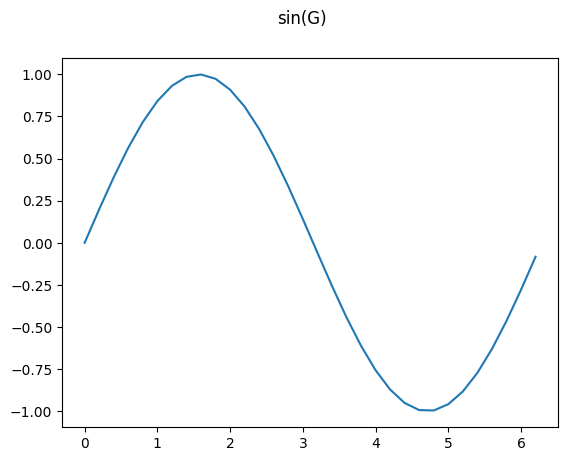

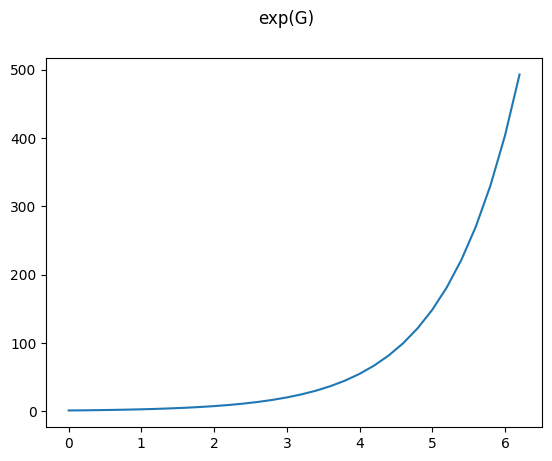

In [11]:
import matplotlib.pyplot as plt
# Applying functions to an array. Functions can be applied element-wise to each element in the array. Some functions can be applied to a whole dimension and reduce it to size 1

# Element-wise functions: common uses are applying trig functions to an array of values:
G = np.arange(0, 2*np.pi, 0.2)
H = np.sin(G)
plt.plot(G, H)
plt.suptitle("sin(G)")
plt.show()

H_1 = np.exp(G)
plt.plot(G, H_1)
plt.suptitle("exp(G)")
plt.show()


In [49]:
# Reduce functions: applied along the selected dimension, consumes all the elements and reduces the axis down to 1 element
# If no axis is specified, the function is applied to the whole array, and reduces it to a scalar
print(A)

I = A.max()
print(f"Maximum value in A: \n{I}")

I_2 = np.mean(A, axis=0, keepdims=True)  # keepdims is needed to preserve the original shape of the axis
print(f"Average of each column in A: \n{I_2}")

I_3 = A.min(axis=1, keepdims=True) 
print(f"Minimum value in each row in A: \n{I_3}")


[[0. 1.]
 [2. 3.]
 [4. 5.]
 [6. 7.]
 [8. 9.]]
Maximum value in A: 
9.0
Average of each column in A: 
[[4. 5.]]
Minimum value in each row in A: 
[[0.]
 [2.]
 [4.]
 [6.]
 [8.]]


In [50]:
# Putting everything together for a practical example

# Defining some helper functions
def plot_point(point):
    plt.rcParams["figure.figsize"] = [3.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    x = point[0]
    y = point[1]
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.grid()
    ax.plot(x, y, marker="o", markersize=10, markeredgecolor="black", markerfacecolor="red")
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    plt.show()



# This function returns an np array that describes a 2d rotation 
# matrix [https://www1.udel.edu/biology/rosewc/kaap686/notes/matrices_rotations.pdf]. 
# These kinds of structures are often used in computer graphics to rotate and translate points in space
def get_rot_clockwise_matrix(angle):
    return np.array([
        [ math.cos(angle), math.sin(angle)],
        [-math.sin(angle), math.cos(angle)]
    ])

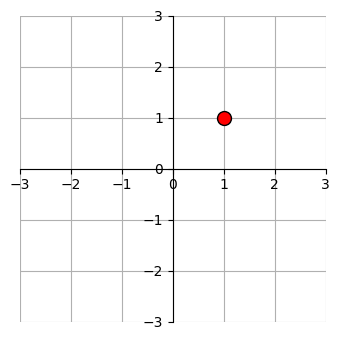

In [51]:
# Define a 2d point p to be a numpy array that holds the co-ordinates 1, 1
p = np.array([1, 1]).reshape(2, 1)
plot_point(p)

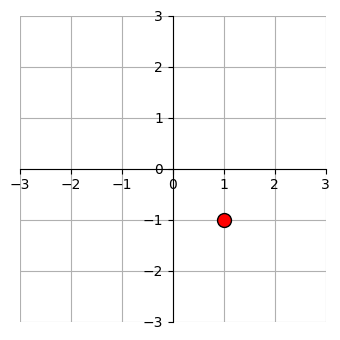

In [52]:
# Define a 90 angle: there are 360 degrees in 2pi radians, so we need to divide by 2 to get the equivalent of 90 degrees
angle = math.pi/2 

# Get the matrix (numpy array) for a clockwise 90 degree rotation
rot90 = get_rot_clockwise_matrix(angle)

# Perform the multiplication and plot!
p = rot90 @ p
plot_point(p)


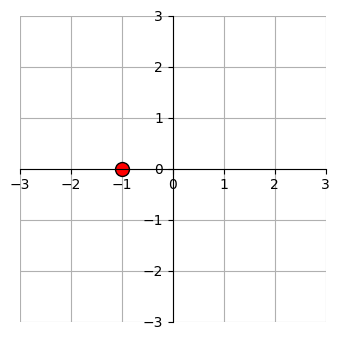

In [53]:
# Translate the position by some arbitrary amount

translation = np.array([[-2, 1]])
p = p + translation.T # transpose the array so it can be broadcast to the point array's shape

plot_point(p)

In [54]:
# Module imports and plot settings

import re
import pandas as pd


pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.mode.chained_assignment = None 
plt.rcParams["figure.figsize"] = [8, 7]
plt.rcParams["figure.autolayout"] = True


# Dataset courtesy of the Metropolitan Museum of Art in New York [https://github.com/metmuseum/openaccess]
MET_DATA_PATH = "./data/metmuseum/metObjects.csv" 




In [55]:
# Taking a look at the dataset
dataset = pd.read_csv(MET_DATA_PATH)
dataset

# We can see that there are several problems with the dataset right off the bat:
# 1. First row seems to contain garbage: none of the column names match up with the data types, and many are NaN
# 2. It looks like many of the columns are completely empty - they add nothing to the dataset but clutter it
# 3. Too many columns! This depends on what your needs are, but we don't need all of them for this exercise
# 4. Inconsistent formatting in the Dimensions column - makes it difficult to use them downstream
# year datatype is float

/tmp/ipykernel_2311156/4002299990.py:2: DtypeWarning: Columns (1,2,3,5,7,11) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(MET_DATA_PATH)


,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constituent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
0,t assigned),https://www.wikidata.org/wiki/Q22672217,ca. 1700,1695,1705,Oil on canvas,46 1/4 x 61 1/4 in. (117.5 x 155.6 cm),Gift of James DeLancey Verplanck and John Baya...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q20170089,NaN,"Metropolitan Museum of Art, New York, NY",Men|Women|Swans|Ducks|Unicorns|Peacocks|Camels...,http://vocab.getty.edu/page/aat/300025928|http...,https://www.wikidata.org/wiki/Q8441|https://ww...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,32.67.1,False,False,True,12856,774,The American Wing,1932,Painting,Autumn Meadows,American,NaN,NaN,NaN,NaN,16235,Former Attribution,Formerly attributed to,Albert Pinkham Ryder,"American, New Bedford, Massachusetts 1847–1917...",,"Ryder, Albert Pinkham",American,1847,1917,NaN,http://vocab.getty.edu/page/ulan/500030492,https://www.wikidata.org/wiki/Q948598,1912–17,1913.0,1916.0,Oil on canvas mounted on wood,21 x 17 1/4 in. (53.3 x 43.8 cm),"Morris K. Jesup Fund, 1932",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q20171406,NaN,"Metropolitan Museum of Art, New York, NY",Horses|Trees|Landscapes,http://vocab.getty.edu/page/aat/300250148|http...,https://www.wikidata.org/wiki/Q726|https://www...
2,54.90.9,False,False,True,12857,NaN,The American Wing,1954,Painting,Bay and Harbor from near Fort Castle William,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca. 1850,1847.0,1850.0,Oil on canvas,20 x 30 in. (50.8 x 76.2 cm),The Edward W. C. Arnold Collection of New York...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q20171426,NaN,"Metropolitan Museum of Art, New York, NY",Ships|Boats,http://vocab.getty.edu/page/aat/300082981|http...,https://www.wikidata.org/wiki/Q11446|https://w...
3,83.2.467,False,False,True,12858,NaN,The American Wing,1883,Pastel,Benjamin Franklin,American,NaN,NaN,NaN,NaN,16555,Artist,After,Jean-Baptiste Greuze,"French, Tournus 1725–1805 Paris",,"Greuze, Jean-Baptiste",French,1725,1805,NaN,http://vocab.getty.edu/page/ulan/500000119,https://www.wikidata.org/wiki/Q347139,after 1777,1777.0,1883.0,"Pastel on toned (now oxidized) wove paper, mou...",22 7/8 x 18 7/8 in. (58.1 x 47.9 cm),"Gift of William H. Huntington, 1883",Made in,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Benjamin Franklin|Portraits|Men,http://vocab.getty.edu/page/ulan/500331804|htt...,https://www.wikidata.org/wiki/Q34969|https://w...
4,63.138.4,False,False,True,12859,774,The American Wing,1963,Painting,Black Hawk,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800–1850,1800.0,1850.0,Oil on canvas mounted on masonite,24 3/4 x 18 1/2in. (62.9 x 47cm)\nFramed: 29 5...,"Gift of Chester Dale, 1963",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q20171438,NaN,"Metropolitan Museum of Art, New York, NY",Men|Portraits,http://vocab.getty.edu/page/aat/300025928|http...,h

In [57]:
# Get rid of the first row, we can use dataframe slicing to accomplish this:
dataset = dataset.iloc[1:]
dataset


,Object Number,Is Highlight,Is Timeline Work,Is Public Domain,Object ID,Gallery Number,Department,AccessionYear,Object Name,Title,Culture,Period,Dynasty,Reign,Portfolio,Constituent ID,Artist Role,Artist Prefix,Artist Display Name,Artist Display Bio,Artist Suffix,Artist Alpha Sort,Artist Nationality,Artist Begin Date,Artist End Date,Artist Gender,Artist ULAN URL,Artist Wikidata URL,Object Date,Object Begin Date,Object End Date,Medium,Dimensions,Credit Line,Geography Type,City,State,County,Country,Region,Subregion,Locale,Locus,Excavation,River,Classification,Rights and Reproduction,Link Resource,Object Wikidata URL,Metadata Date,Repository,Tags,Tags AAT URL,Tags Wikidata URL
2,54.90.9,False,False,True,12857,NaN,The American Wing,1954,Painting,Bay and Harbor from near Fort Castle William,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca. 1850,1847.0,1850.0,Oil on canvas,20 x 30 in. (50.8 x 76.2 cm),The Edward W. C. Arnold Collection of New York...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q20171426,NaN,"Metropolitan Museum of Art, New York, NY",Ships|Boats,http://vocab.getty.edu/page/aat/300082981|http...,https://www.wikidata.org/wiki/Q11446|https://w...
3,83.2.467,False,False,True,12858,NaN,The American Wing,1883,Pastel,Benjamin Franklin,American,NaN,NaN,NaN,NaN,16555,Artist,After,Jean-Baptiste Greuze,"French, Tournus 1725–1805 Paris",,"Greuze, Jean-Baptiste",French,1725,1805,NaN,http://vocab.getty.edu/page/ulan/500000119,https://www.wikidata.org/wiki/Q347139,after 1777,1777.0,1883.0,"Pastel on toned (now oxidized) wove paper, mou...",22 7/8 x 18 7/8 in. (58.1 x 47.9 cm),"Gift of William H. Huntington, 1883",Made in,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Benjamin Franklin|Portraits|Men,http://vocab.getty.edu/page/ulan/500331804|htt...,https://www.wikidata.org/wiki/Q34969|https://w...
4,63.138.4,False,False,True,12859,774,The American Wing,1963,Painting,Black Hawk,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800–1850,1800.0,1850.0,Oil on canvas mounted on masonite,24 3/4 x 18 1/2in. (62.9 x 47cm)\nFramed: 29 5...,"Gift of Chester Dale, 1963",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q20171438,NaN,"Metropolitan Museum of Art, New York, NY",Men|Portraits,http://vocab.getty.edu/page/aat/300025928|http...,https://www.wikidata.org/wiki/Q8441|https://ww...
5,69.279.1,False,False,True,12860,708,The American Wing,1969,Painting,Boy with a Fawn,American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca. 1720,1717.0,1720.0,Oil on canvas,39 3/8 x 27 5/8 in. (100 x 70.2 cm),Gift of Edgar William and Bernice Chrysler Gar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,https://www.wikidata.org/wiki/Q20171447,NaN,"Metropolitan Museum of Art, New York, NY",Boys|Portraits|Deer,http://vocab.getty.edu/page/aat/300247598|http...,https://www.wikidata.org/wiki/Q3010|https://ww...
6,66.229.1,False,False,True,12862,NaN,The American Wing,1966,Watercolor,"Brooklyn, Long Island (View on the East River)",American,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca. 1778,1775.0,1778.0,"Watercolor, pen and black ink on off-white lai...",14 3/16 x 25 1/16 in. (36 x 63.7 cm),"Gift of Mr. and Mrs. J. William Middendorf II,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://www.metmuseum.org/art/collection/search...,NaN,NaN,"Metropolitan Museum of Art, New York, NY",Horse Riding|Rivers|Landscapes|Trees|Boats,http://vocab.getty.edu/page/aat/300249313|http...,https://www.wikidata.org/wiki/Q179226|https://...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [58]:
# Get rid of all columns that are completely empty
dataset = dataset.dropna(how='all', axis=1) # how=all means drop this key if all items are NaN. Axis=1 means work on columns

# At this point, we can also drop the columns that are irrelevant to our needs
exclude_cols = [
    "Country",
    "Culture",
    "Is Highlight",
    "Is Timeline Work",
    "Object End Date",
    "Gallery Number",
    "Period",
    "Constituent ID",
    "Artist Role",
    "Artist Prefix",
    "Artist Display Name",
    "Artist Display Bio",
    "Artist Suffix",
    "Artist Alpha Sort",
    "Artist Gender",
    "Artist Nationality",
    "Artist ULAN URL",
    "Artist Wikidata URL",
    "Credit Line",
    "Object ID",
    "Geography Type",
    "City",
    "State",
    "County",
    "Region",
    "Classification",
    "Rights and Reproduction",
    "Link Resource",
    "Object Wikidata URL",
    "Repository",
    "Tags AAT URL",
    "Tags Wikidata URL",
    "Artist Begin Date",
    "Artist End Date",
    "Object Date",
]

dataset = dataset.drop(exclude_cols, axis=1) # again axis=1 means we work on the columns of this dataframe
dataset


,Object Number,Is Public Domain,Department,AccessionYear,Object Name,Title,Object Begin Date,Medium,Dimensions,Tags
2,54.90.9,True,The American Wing,1954,Painting,Bay and Harbor from near Fort Castle William,1847.0,Oil on canvas,20 x 30 in. (50.8 x 76.2 cm),Ships|Boats
3,83.2.467,True,The American Wing,1883,Pastel,Benjamin Franklin,1777.0,"Pastel on toned (now oxidized) wove paper, mou...",22 7/8 x 18 7/8 in. (58.1 x 47.9 cm),Benjamin Franklin|Portraits|Men
4,63.138.4,True,The American Wing,1963,Painting,Black Hawk,1800.0,Oil on canvas mounted on masonite,24 3/4 x 18 1/2in. (62.9 x 47cm)\nFramed: 29 5...,Men|Portraits
5,69.279.1,True,The American Wing,1969,Painting,Boy with a Fawn,1717.0,Oil on canvas,39 3/8 x 27 5/8 in. (100 x 70.2 cm),Boys|Portraits|Deer
6,66.229.1,True,The American Wing,1966,Watercolor,"Brooklyn, Long Island (View on the East River)",1775.0,"Watercolor, pen and black ink on off-white lai...",14 3/16 x 25 1/16 in. (36 x 63.7 cm),Horse Riding|Rivers|Landscapes|Trees|Boats
...,...,...,...,...,...,...,...,...,...,...
44362,67.55.160,False,The American Wing,1967.0,Watercolor,An American Schooner,1800.0,Watercolor and graphite on off-white wove paper,6 7/16 x 9 9/16 in. (16.4 x 24.3 cm),Ships
44363,92.10.97a,True,The American Wing,1892.0,Medal,"To Cyrus W. Field from New York Friends, for L...",1858.0,Copper and gold leaf,Diam. 2 in. (5.1 cm),Men|Profiles|Transatlantic Cable
44364,1995.379.2,True,The American Wing,1995.0,Drawing,Abigail Smith Adams,1751.0,Pastel on gray (now oxidized) laid paper,9 9/16 x 7 7/16 in. (24.3 x 18.9 cm),Portraits|Women
44365,22.28.2,True,The American Wing,1922.0,Watercolor,"Architectural drawing of Duncan Phyfe’s house,...",1817.0,"Watercolor, goauche, gum arabic, and graphite ...",15 5/8 x 11 9/16 in. (39.7 x 29.4 cm),Architecture|Houses|New York City


In [59]:
# Dropping records (rows) - we can also get rid of rows that do not meet certain criteria
# For example, given a subset of columns that we deem very important, we can drop all rows are NaN in any of these fields

important_cols = ['Tags', 'Dimensions', 'Object Begin Date', 'AccessionYear'] 
dataset = dataset.dropna(subset=important_cols)
dataset

# Note that doing this cut the size of our dataset in half! Compare the number of rows in the previous cell to this one.

,Object Number,Is Public Domain,Department,AccessionYear,Object Name,Title,Object Begin Date,Medium,Dimensions,Tags
2,54.90.9,True,The American Wing,1954,Painting,Bay and Harbor from near Fort Castle William,1847.0,Oil on canvas,20 x 30 in. (50.8 x 76.2 cm),Ships|Boats
3,83.2.467,True,The American Wing,1883,Pastel,Benjamin Franklin,1777.0,"Pastel on toned (now oxidized) wove paper, mou...",22 7/8 x 18 7/8 in. (58.1 x 47.9 cm),Benjamin Franklin|Portraits|Men
4,63.138.4,True,The American Wing,1963,Painting,Black Hawk,1800.0,Oil on canvas mounted on masonite,24 3/4 x 18 1/2in. (62.9 x 47cm)\nFramed: 29 5...,Men|Portraits
5,69.279.1,True,The American Wing,1969,Painting,Boy with a Fawn,1717.0,Oil on canvas,39 3/8 x 27 5/8 in. (100 x 70.2 cm),Boys|Portraits|Deer
6,66.229.1,True,The American Wing,1966,Watercolor,"Brooklyn, Long Island (View on the East River)",1775.0,"Watercolor, pen and black ink on off-white lai...",14 3/16 x 25 1/16 in. (36 x 63.7 cm),Horse Riding|Rivers|Landscapes|Trees|Boats
...,...,...,...,...,...,...,...,...,...,...
44361,66.214,True,The American Wing,1966.0,Painting,After the Storm,1867.0,Oil on canvas,26 3/4 x 38 3/4 in. (67.9 x 98.4 cm),Rivers|Landscapes
44362,67.55.160,False,The American Wing,1967.0,Watercolor,An American Schooner,1800.0,Watercolor and graphite on off-white wove paper,6 7/16 x 9 9/16 in. (16.4 x 24.3 cm),Ships
44363,92.10.97a,True,The American Wing,1892.0,Medal,"To Cyrus W. Field from New York Friends, for L...",1858.0,Copper and gold leaf,Diam. 2 in. (5.1 cm),Men|Profiles|Transatlantic Cable
44364,1995.379.2,True,The American Wing,1995.0,Drawing,Abigail Smith Adams,1751.0,Pastel on gray (now oxidized) laid paper,9 9/16 x 7 7/16 in. (24.3 x 18.9 cm),Portraits|Women


In [60]:
# Cleaning up the Dimensions field - we need it to have consistent formatting so that any functions we write 
# later can work with the values without any complicated processing. Doing the complicated work up front 
# saves a lot of time down the line!

def extract_dimensions(dim_str):
    # Don't worry too much about how exactly this function extracts the dimensions
    # this is just to show that we can write arbitrarily complex cleaning functions
    # and apply it to a Dataframe's columns.
    dimensions_exp = r"(?<=\()( *\d.+?)(?=cm\))"
    delimiter_exp = r"(?:\d+\.?\d* *)([^\.\n])(?: *\d+\.?\d* *)?(?:[^\.\n] *\d+\.?\d*)?"
    try:
        dim_str = dim_str.split("\n")[0]
        dimensions = re.search(dimensions_exp, dim_str).group(0)
        delimiter = re.search(delimiter_exp, dimensions.strip()).groups()[0]
        if not delimiter.isnumeric():
            # There are multiple dimensions
            retval = ','.join(dimensions.split(delimiter))
        else:
            retval = dimensions
    except AttributeError as e:
        retval = np.nan
    finally:
        return retval

In [61]:
# Standardise the dimensions of the pieces - now this column will only have values that look like:
#    1. a OR
#    2. a, b OR
#    3. a, b, c
#    where a, b and c are lengths in centimetres

dataset['Dimensions'] = dataset['Dimensions'].apply(extract_dimensions) # using the extract_dimensions function we defined earlier

# Because extract_dimensions can fail and return NaN, we also need to remove any records where Dimensions is NaN
dataset = dataset.dropna(subset=important_cols)
dataset

,Object Number,Is Public Domain,Department,AccessionYear,Object Name,Title,Object Begin Date,Medium,Dimensions,Tags
2,54.90.9,True,The American Wing,1954,Painting,Bay and Harbor from near Fort Castle William,1847.0,Oil on canvas,"50.8 , 76.2",Ships|Boats
3,83.2.467,True,The American Wing,1883,Pastel,Benjamin Franklin,1777.0,"Pastel on toned (now oxidized) wove paper, mou...","58.1 , 47.9",Benjamin Franklin|Portraits|Men
4,63.138.4,True,The American Wing,1963,Painting,Black Hawk,1800.0,Oil on canvas mounted on masonite,"62.9 , 47",Men|Portraits
5,69.279.1,True,The American Wing,1969,Painting,Boy with a Fawn,1717.0,Oil on canvas,"100 , 70.2",Boys|Portraits|Deer
6,66.229.1,True,The American Wing,1966,Watercolor,"Brooklyn, Long Island (View on the East River)",1775.0,"Watercolor, pen and black ink on off-white lai...","36 , 63.7",Horse Riding|Rivers|Landscapes|Trees|Boats
...,...,...,...,...,...,...,...,...,...,...
44361,66.214,True,The American Wing,1966.0,Painting,After the Storm,1867.0,Oil on canvas,"67.9 , 98.4",Rivers|Landscapes
44362,67.55.160,False,The American Wing,1967.0,Watercolor,An American Schooner,1800.0,Watercolor and graphite on off-white wove paper,"16.4 , 24.3",Ships
44363,92.10.97a,True,The American Wing,1892.0,Medal,"To Cyrus W. Field from New York Friends, for L...",1858.0,Copper and gold leaf,5.1,Men|Profiles|Transatlantic Cable
44364,1995.379.2,True,The American Wing,1995.0,Drawing,Abigail Smith Adams,1751.0,Pastel on gray (now oxidized) laid paper,"24.3 , 18.9",Portraits|Women


In [64]:
# Setting default values. Another way to deal with missing data is to asssign it a default value.
# For example, artists are known to occasionally not title their work (why??). Unfortunately, this dataset does not 
# handle this very gracefully. Fortunately, there is a quick fix

dataset['Title'].fillna('Untitled', inplace=True) # This replaces any instance of NaN in the Title column with Untitled

# We change some data types that don't really make sense: AccessionYear and Object Begin Date were originally
# loaded in with mixed datatypes (some are strings, some are numbers), which makes it difficult to sort correctly.
dataset = dataset.astype({'AccessionYear': 'int', 'Object Begin Date': 'int'})

# Finally, we can sort a dataframe based on the values in a specific column
dataset = dataset.sort_values('AccessionYear')


dataset

# We can now begin to ask some interesting questions about this dataset:
# Q1 Which department houses the oldest artwork in the museum?
# Q2 What is the proportion of artworks from each department?
# Q3 What is the average size (in cm^2) of Paintings in the Asian wing?
# Q4 How many artworks were delivered to the museum each decade, and what department took them?

,Object Number,Is Public Domain,Department,AccessionYear,Object Name,Title,Object Begin Date,Medium,Dimensions,Tags
43346,72.3,True,The American Wing,1872,Sculpture,California,1850,Marble,"180.3 , 46.4 , 62.9",Female Nudes
42670,73.5,True,The American Wing,1873,Painting,The Wages of War,1848,Oil on canvas,"122.6 , 193.7",Soldiers|Children|Men|Women
42577,74.43,True,The American Wing,1874,Painting,Calliope,1869,Oil on canvas,"110.5 , 83.8",Women|Musical Instruments
42578,74.42,True,The American Wing,1874,Painting,Clio,1869,Oil on canvas,"110.5 , 83.8",Portraits|Women
42579,74.49,True,The American Wing,1874,Painting,Erato,1869,Oil on canvas,"110.5 , 83.8",Lyres|Women|Cupid|Muses
...,...,...,...,...,...,...,...,...,...,...
22732,2020.323.9a–e,True,Asian Art,2020,Writing box,Untitled,1800,"Gold maki-e, inlaid mother-of-pearl, and lead ...",10.2,Deer
22714,2020.323.6,True,Asian Art,2020,Drum,Untitled,1500,Gold makie on black lacquer,28.3,Fans
22787,2020.323.16,True,Asian Art,2020,Food stand,Untitled,1600,Lacquer with gold and litharge painting,16.2,Landscapes
81,2021.231,False,The American Wing,2021,Drawing,Study of the Queen's Robes (Study for Portrait...,1835,Graphite on paper,"23 , 18.7",Queen Victoria


In [65]:
# Let's tackle Q3:  What is the average size (in cm^2) of Paintings in the Asian wing?
# We can select the pieces that belong to the Asian Art department that are paintings:
asian_paintings = dataset.loc[(dataset['Department'] == 'Asian Art') & (dataset['Object Name'] == 'Painting')]
asian_paintings

,Object Number,Is Public Domain,Department,AccessionYear,Object Name,Title,Object Begin Date,Medium,Dimensions,Tags
22587,08.148.6,True,Asian Art,1908,Painting,Untitled,1797,Matted painting; ink and color on silk,"35.4 , 54.4",Mountains|Landscapes
22586,08.148.5,True,Asian Art,1908,Painting,Untitled,1797,Matted painting; ink and color on silk,"35.4 , 54.4",Waves|Beaches
22590,08.148.9,True,Asian Art,1908,Painting,Untitled,1797,Matted painting; ink and color on silk,"20.9 , 31",Landscapes|Mountains
22585,08.148.4,True,Asian Art,1908,Painting,Untitled,1797,Matted painting; ink and color on silk (Ukiyo-e),"35.4 , 54.5",Waterfalls
22588,08.148.7,True,Asian Art,1908,Painting,Untitled,1797,Matted painting; ink and color on silk,"35.4 , 54.4",Boats
...,...,...,...,...,...,...,...,...,...,...
20535,1996.384,True,Asian Art,1996,Painting,Untitled,1790,Ink heightened with color on paper,"20.6 , 14",Swords|Boys|Goddess|Heads
20536,1996.357,True,Asian Art,1996,Painting,Untitled,1695,"Ink, opaque watercolor, and gold on paper","90.8 , 52.1",Performance|Men|Women|Elephants|Horses|Dancing
22025,1997.359,True,Asian Art,1997,Painting,Untitled,1765,Ink and opaque watercolor on paper.,"22 , 30.5",Men|Horse Riding
22218,1998.161,True,Asian Art,1998,Painting,Untitled,1697,"Opaque watercolor, ink and gold on paper","24.1 , 18.6",Men|Birds|Women|Peacocks|Gardens|Dogs


In [66]:
# We can apply a simple area calculation function to each item in the Dimensions column

def calc_area(dim_string):
    # Note that some paintings are listed as having only 1 dimension - here we can assume that they are 
    # circular and that the given dimension is its diameter (and probably not radius as that cannot be measured as easily)
    dims = dim_string.split(',') # extract dimensions from the string and place them into a list
    if len(dims) == 1:
        # We have a circular painting, apply the circular area formula
        diameter = float(dims[0])  # dimensions are strings, so need to be converted to floats
        radius = diameter/2        
        return math.pi * radius * radius
    elif len(dims) == 2:
        # We have a rectangular painting, use the rectangular area formula
        width, height  = float(dims[0]), float(dims[1]) 
        return width * height
    else:
        assert False, "Unreachable!" # This condition should never be reached, we're asssuming paintings can only have either 1 or 2 dimensions
        

asian_paintings['Area']  = asian_paintings['Dimensions'].apply(calc_area)
asian_paintings

,Object Number,Is Public Domain,Department,AccessionYear,Object Name,Title,Object Begin Date,Medium,Dimensions,Tags,Area
22587,08.148.6,True,Asian Art,1908,Painting,Untitled,1797,Matted painting; ink and color on silk,"35.4 , 54.4",Mountains|Landscapes,1925.76
22586,08.148.5,True,Asian Art,1908,Painting,Untitled,1797,Matted painting; ink and color on silk,"35.4 , 54.4",Waves|Beaches,1925.76
22590,08.148.9,True,Asian Art,1908,Painting,Untitled,1797,Matted painting; ink and color on silk,"20.9 , 31",Landscapes|Mountains,647.90
22585,08.148.4,True,Asian Art,1908,Painting,Untitled,1797,Matted painting; ink and color on silk (Ukiyo-e),"35.4 , 54.5",Waterfalls,1929.30
22588,08.148.7,True,Asian Art,1908,Painting,Untitled,1797,Matted painting; ink and color on silk,"35.4 , 54.4",Boats,1925.76
...,...,...,...,...,...,...,...,...,...,...,...
20535,1996.384,True,Asian Art,1996,Painting,Untitled,1790,Ink heightened with color on paper,"20.6 , 14",Swords|Boys|Goddess|Heads,288.40
20536,1996.357,True,Asian Art,1996,Painting,Untitled,1695,"Ink, opaque watercolor, and gold on paper","90.8 , 52.1",Performance|Men|Women|Elephants|Horses|Dancing,4730.68
22025,1997.359,True,Asian Art,1997,Painting,Untitled,1765,Ink and opaque watercolor on paper.,"22 , 30.5",Men|Horse Riding,671.00
22218,1998.161,True,Asian Art,1998,Painting,Untitled,1697,"Opaque watercolor, ink and gold on paper","24.1 , 18.6",Men|Birds|Women|Peacocks|Gardens|Dogs,448.26


In [67]:
# We now have an Area column that we can reduce to find the average of the paintings in the Asian Art department:

average_area = asian_paintings['Area'].mean()
average_area

1880.5529310453526

In [68]:
# Just displaying the cleaned dataset, so we have a visual reference for the next problem
dataset

,Object Number,Is Public Domain,Department,AccessionYear,Object Name,Title,Object Begin Date,Medium,Dimensions,Tags
43346,72.3,True,The American Wing,1872,Sculpture,California,1850,Marble,"180.3 , 46.4 , 62.9",Female Nudes
42670,73.5,True,The American Wing,1873,Painting,The Wages of War,1848,Oil on canvas,"122.6 , 193.7",Soldiers|Children|Men|Women
42577,74.43,True,The American Wing,1874,Painting,Calliope,1869,Oil on canvas,"110.5 , 83.8",Women|Musical Instruments
42578,74.42,True,The American Wing,1874,Painting,Clio,1869,Oil on canvas,"110.5 , 83.8",Portraits|Women
42579,74.49,True,The American Wing,1874,Painting,Erato,1869,Oil on canvas,"110.5 , 83.8",Lyres|Women|Cupid|Muses
...,...,...,...,...,...,...,...,...,...,...
22732,2020.323.9a–e,True,Asian Art,2020,Writing box,Untitled,1800,"Gold maki-e, inlaid mother-of-pearl, and lead ...",10.2,Deer
22714,2020.323.6,True,Asian Art,2020,Drum,Untitled,1500,Gold makie on black lacquer,28.3,Fans
22787,2020.323.16,True,Asian Art,2020,Food stand,Untitled,1600,Lacquer with gold and litharge painting,16.2,Landscapes
81,2021.231,False,The American Wing,2021,Drawing,Study of the Queen's Robes (Study for Portrait...,1835,Graphite on paper,"23 , 18.7",Queen Victoria


In [69]:
# Let's have a look the last question: How many artworks were delivered to the museum each decade, and what department took them?

# We want to group our findings by decade, so let's create an array of all the decades from when the museum started accepting pieces, to when the dataset was released.
# We've already sorted the dataframe by Accession year, so this should be easy - just look at the top (1872) and bottom (2021) record
d = 10
start = 1872
end = 2021
decades = np.arange(start,  end + d, d)
print(decades)



[1872 1882 1892 1902 1912 1922 1932 1942 1952 1962 1972 1982 1992 2002
 2012 2022]


In [70]:
# Define a helper function that returns a dataframe for every decade in our list, along with a label for each one

def group_by_year(dataframe, years):
    subsets = []
    labels = []
    year_idx = 0
    while year_idx < len(years) - 1:
        start_year = years[year_idx]
        end_year = years[year_idx + 1]
        mask = (dataframe['AccessionYear'] > start_year) & (dataframe['AccessionYear'] <= end_year)
        label = f"{start_year} - {end_year}"
        subsets.append(dataframe.loc[mask])
        labels.append(label)
        year_idx += 1
    return subsets, labels
        

    


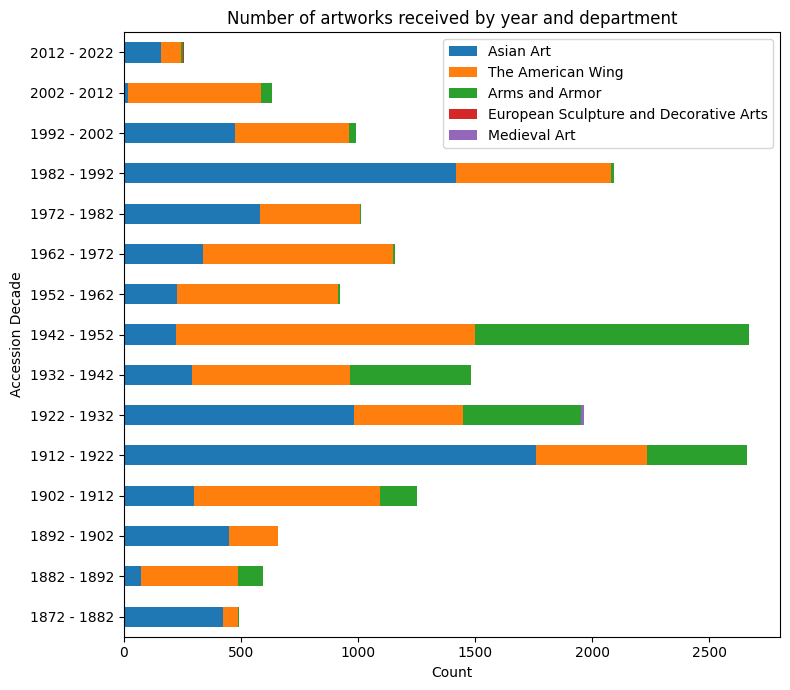

In [75]:
grouped_datasets, labels = group_by_year(dataset, decades)

combined = pd.concat([d['Department'].value_counts() for d in grouped_datasets], axis=1, keys=labels)
combined = combined.fillna(0)
combined = combined.astype('int')
combined = combined.transpose()


fig = plt.figure()
plt.title("Number of artworks received by year and department")
combined.plot.barh(stacked=True,
                   ax=fig.gca())
plt.legend()
plt.xlabel("Count")
plt.ylabel("Accession Decade")
plt.show()

# When data is cleaned up and presented in this way, it offers insights into the dataset that can uncover interesting 
# facts about it that we might not have necessarily set out to find. For instance, note the sudden increase in
# Arms and Armor pieces during the 1940s. Wonder where they came from...